# Pandas TA ([pandas_ta](https://github.com/twopirllc/pandas-ta)) Strategies for Custom Technical Analysis

## Topics
- What is a Pandas TA Strategy?
    - Builtin Strategies: __AllStrategy__ and __CommonStrategy__
    - Creating Strategies
- Watchlist Class
    - Strategy Management and Execution
    - **NOTE:** The **watchlist** module is independent of Pandas TA. To easily use it, copy it from your local pandas_ta installation directory into your project directory.
- Indicator Composition/Chaining for more Complex Strategies
    - Comprehensive Example: _MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns_

In [1]:
%matplotlib inline
import datetime as dt

from tqdm import tqdm

import pandas as pd
import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api

from watchlist import Watchlist # Is this failing? If so, copy it locally. See above.

print(f"\nPandas TA v{ta.version}\nTo install the Latest Version:\n$ pip install -U git+https://github.com/twopirllc/pandas-ta\n")
%pylab inline


Pandas TA v0.2.74b0
To install the Latest Version:
$ pip install -U git+https://github.com/twopirllc/pandas-ta

Populating the interactive namespace from numpy and matplotlib


# What is a Pandas TA Strategy?
A _Strategy_ is a simple way to name and group your favorite TA indicators. Technically, a _Strategy_ is a simple Data Class to contain list of indicators and their parameters. __Note__: _Strategy_ is experimental and subject to change. Pandas TA comes with two basic Strategies: __AllStrategy__ and __CommonStrategy__.

## Strategy Requirements:
- _name_: Some short memorable string.  _Note_: Case-insensitive "All" is reserved.
- _ta_: A list of dicts containing keyword arguments to identify the indicator and the indicator's arguments

## Optional Requirements:
- _description_: A more detailed description of what the Strategy tries to capture. Default: None
- _created_: At datetime string of when it was created. Default: Automatically generated.

### Things to note:
- A Strategy will __fail__ when consumed by Pandas TA if there is no {"kind": "indicator name"} attribute.

# Builtin Examples

### All
Default Values

In [2]:
AllStrategy = ta.AllStrategy
print("name =", AllStrategy.name)
print("description =", AllStrategy.description)
print("created =", AllStrategy.created)
print("ta =", AllStrategy.ta)

name = All
description = All the indicators with their default settings. Pandas TA default.
created = Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)
ta = None


### Common
Default Values

In [3]:
CommonStrategy = ta.CommonStrategy
print("name =", CommonStrategy.name)
print("description =", CommonStrategy.description)
print("created =", CommonStrategy.created)
print("ta =", CommonStrategy.ta)

name = Common Price and Volume SMAs
description = Common Price SMAs: 10, 20, 50, 200 and Volume SMA: 20.
created = Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)
ta = [{'kind': 'sma', 'length': 10}, {'kind': 'sma', 'length': 20}, {'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}, {'kind': 'sma', 'close': 'volume', 'length': 20, 'prefix': 'VOL'}]


# Creating Strategies
Strategies require a **name** and an array of dicts containing the "kind" of indicator ("sma") and other potential parameters for **ta**.

### Simple Strategy A

In [4]:
custom_a = ta.Strategy(name="A", ta=[{"kind": "sma", "length": 50}, {"kind": "sma", "length": 200}])
custom_a

Strategy(name='A', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}], description='TA Description', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

### Simple Strategy B

In [5]:
custom_b = ta.Strategy(name="B", ta=[{"kind": "ema", "length": 8}, {"kind": "ema", "length": 21}, {"kind": "log_return", "cumulative": True}, {"kind": "rsi"}, {"kind": "supertrend"}])
custom_b

Strategy(name='B', ta=[{'kind': 'ema', 'length': 8}, {'kind': 'ema', 'length': 21}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'rsi'}, {'kind': 'supertrend'}], description='TA Description', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

### Bad Strategy. (Misspelled Indicator)

In [6]:
# Misspelled indicator, will fail later when ran with Pandas TA
custom_run_failure = ta.Strategy(name="Runtime Failure", ta=[{"kind": "percet_return"}])
custom_run_failure

Strategy(name='Runtime Failure', ta=[{'kind': 'percet_return'}], description='TA Description', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

# Strategy Management and Execution with _Watchlist_

### Initialize AlphaVantage Data Source

In [7]:
AV = AlphaVantage(
    api_key="YOUR API KEY", premium=False,
    output_size='full', clean=True,
    export_path=".", export=True
)
AV

AlphaVantage(
  end_point:str = https://www.alphavantage.co/query,
  api_key:str = YOUR API KEY,
  export:bool = True,
  export_path:str = .,
  output_size:str = full,
  output:str = csv,
  datatype:str = json,
  clean:bool = True,
  proxy:dict = {}
)

### Create Watchlist and set it's 'ds' to AlphaVantage

In [8]:
data_source = "av" # Default
# data_source = "yahoo"
watch = Watchlist(["SPY", "IWM"], ds_name=data_source, timed=False)

#### Info about the Watchlist. Note, the default Strategy is "All"

In [9]:
watch

Watch(name='Watch: SPY, IWM', ds_name='av', tickers[2]='SPY, IWM', tf='D', strategy[5]='Common Price and Volume SMAs')

### Help about Watchlist

In [10]:
help(Watchlist)

Help on class Watchlist in module watchlist:

class Watchlist(builtins.object)
 |  Watchlist(tickers: list, tf: str = None, name: str = None, strategy: pandas_ta.core.Strategy = None, ds_name: str = 'av', **kwargs)
 |  
 |  # Watchlist Class (** This is subject to change! **)
 |  A simple Class to load/download financial market data and automatically
 |  apply Technical Analysis indicators with a Pandas TA Strategy.
 |  
 |  Default Strategy: pandas_ta.CommonStrategy
 |  
 |  ## Package Support:
 |  ### Data Source (Default: AlphaVantage)
 |  - AlphaVantage (pip install alphaVantage-api).
 |  - Python Binance (pip install python-binance). # Future Support
 |  - Yahoo Finance (pip install yfinance). # Almost Supported
 |  
 |  # Technical Analysis:
 |  - Pandas TA (pip install pandas_ta)
 |  
 |  ## Required Arguments:
 |  - tickers: A list of strings containing tickers. Example: ["SPY", "AAPL"]
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: list, tf: str = None, name: 

### Default Strategy is "Common"

In [11]:
# No arguments loads all the tickers and applies the Strategy to each ticker.
# The result can be accessed with Watchlist's 'data' property which returns a 
# dictionary keyed by ticker and DataFrames as values 
watch.load(verbose=True)

[!] Loading All: SPY, IWM
[+] Downloading[av]: SPY[D]
[+] Strategy: Common Price and Volume SMAs
[i] Indicator arguments: {'timed': False, 'append': True}
[i] Multiprocessing 5 indicators with 7 chunks and 8/8 cpus.
[i] Total indicators: 5
[i] Columns added: 5
[i] Last Run: Wednesday May 19, 2021, NYSE: 7:22:10, Local: 11:22:10 PDT, Day 139/365 (38.00%)
[+] Downloading[av]: IWM[D]
[+] Strategy: Common Price and Volume SMAs
[i] Indicator arguments: {'timed': False, 'append': True}
[i] Multiprocessing 5 indicators with 7 chunks and 8/8 cpus.
[i] Total indicators: 5
[i] Columns added: 5
[i] Last Run: Wednesday May 19, 2021, NYSE: 7:22:28, Local: 11:22:28 PDT, Day 139/365 (38.00%)


In [12]:
", ".join([f"{t}: {d.shape}" for t,d in watch.data.items()])

'SPY: (5421, 10), IWM: (5277, 10)'

In [13]:
watch.data["SPY"]

,open,high,low,close,volume,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
date,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-12,411.2300,412.5900,404.0000,405.4100,134811046.0,416.568,416.1900,403.9984,368.48120,77217590.60
2021-05-13,407.0700,412.3500,407.0200,410.2800,106393963.0,415.590,415.9105,404.5756,368.92675,79525796.65
2021-05-14,413.2100,417.4900,413.1800,416.5800,82201629.0,415.518,415.8765,405.3732,369.38405,79534014.20


[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,SMA_10,SMA_20,SMA_50,SMA_200,VOL_SMA_20
date,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-12,411.2300,412.5900,404.0000,405.4100,134811046.0,416.568,416.1900,403.9984,368.48120,77217590.60
2021-05-13,407.0700,412.3500,407.0200,410.2800,106393963.0,415.590,415.9105,404.5756,368.92675,79525796.65
2021-05-14,413.2100,417.4900,413.1800,416.5800,82201629.0,415.518,415.8765,405.3732,369.38405,79534014.20


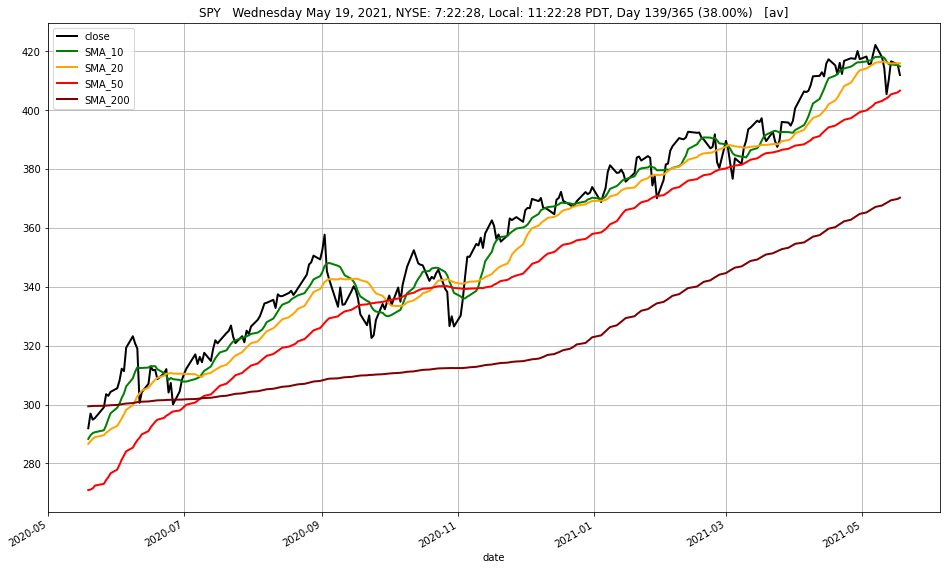

In [14]:
watch.load("SPY", plot=True, mas=True)

## Easy to swap Strategies and run them

### Running Simple Strategy A

In [15]:
# Load custom_a into Watchlist and verify
watch.strategy = custom_a
# watch.debug = True
watch.strategy

Strategy(name='A', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}], description='TA Description', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

In [16]:
watch.load("IWM")

[i] Loaded IWM[D]: IWM_D.csv


,open,high,low,close,volume,SMA_50,SMA_200
date,,,,,,,
2000-05-26,91.06,91.44,90.630,91.44,37400.0,NaN,NaN
2000-05-30,92.75,94.81,92.750,94.81,28800.0,NaN,NaN
2000-05-31,95.13,96.38,95.130,95.75,18000.0,NaN,NaN
2000-06-01,97.11,97.31,97.110,97.31,3500.0,NaN,NaN
2000-06-02,101.70,102.40,101.700,102.40,14700.0,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-12,217.10,218.77,211.540,211.85,42113404.0,223.0168,190.10635
2021-05-13,213.31,217.44,211.800,215.75,37739892.0,222.9454,190.45445
2021-05-14,217.94,221.41,215.678,221.02,25070399.0,223.1020,190.81280


### Running Simple Strategy B

In [17]:
# Load custom_b into Watchlist and verify
watch.strategy = custom_b
watch.strategy

Strategy(name='B', ta=[{'kind': 'ema', 'length': 8}, {'kind': 'ema', 'length': 21}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'rsi'}, {'kind': 'supertrend'}], description='TA Description', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

In [18]:
watch.load("SPY")

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,EMA_8,EMA_21,CUMLOGRET_1,RSI_14,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0
date,,,,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,0.000000,NaN,0.000000,1,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,-0.007172,NaN,NaN,1,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,-0.000461,NaN,NaN,1,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,0.007120,NaN,NaN,1,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,0.016915,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-12,411.2300,412.5900,404.0000,405.4100,134811046.0,414.652269,413.799933,1.095466,41.002052,422.422132,-1,NaN,422.422132
2021-05-13,407.0700,412.3500,407.0200,410.2800,106393963.0,413.680653,413.479939,1.107407,47.683731,422.422132,-1,NaN,422.422132
2021-05-14,413.2100,417.4900,413.1800,416.5800,82201629.0,414.324953,413.761763,1.122646,54.813191,422.422132,-1,NaN,422.422132


### Running Bad Strategy. (Misspelled indicator)

In [19]:
# Load custom_run_failure into Watchlist and verify
watch.strategy = custom_run_failure
watch.strategy

Strategy(name='Runtime Failure', ta=[{'kind': 'percet_return'}], description='TA Description', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

In [20]:
try:
    iwm = watch.load("IWM")
except AttributeError as error:
    print(f"[X] Oops! {error}")

[i] Loaded IWM[D]: IWM_D.csv
[X] Oops! 'AnalysisIndicators' object has no attribute 'percet_return'


# Indicator Composition/Chaining
- When you need an indicator to depend on the value of a prior indicator
- Utilitze _prefix_ or _suffix_ to help identify unique columns or avoid column name clashes.

### Volume MAs and MA chains

In [21]:
# Set EMA's and SMA's 'close' to 'volume' to create Volume MAs, prefix 'volume' MAs with 'VOLUME' so easy to identify the column
# Take a price EMA and apply LINREG from EMA's output
volmas_price_ma_chain = [
    {"kind":"ema", "close": "volume", "length": 10, "prefix": "VOLUME"},
    {"kind":"sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    {"kind":"ema", "length": 5},
    {"kind":"linreg", "close": "EMA_5", "length": 8, "prefix": "EMA_5"},
]
vp_ma_chain_ta = ta.Strategy("Volume MAs and Price MA chain", volmas_price_ma_chain)
vp_ma_chain_ta

Strategy(name='Volume MAs and Price MA chain', ta=[{'kind': 'ema', 'close': 'volume', 'length': 10, 'prefix': 'VOLUME'}, {'kind': 'sma', 'close': 'volume', 'length': 20, 'prefix': 'VOLUME'}, {'kind': 'ema', 'length': 5}, {'kind': 'linreg', 'close': 'EMA_5', 'length': 8, 'prefix': 'EMA_5'}], description='TA Description', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

In [22]:
# Update the Watchlist
watch.strategy = vp_ma_chain_ta
watch.strategy.name

'Volume MAs and Price MA chain'

In [23]:
spy = watch.load("SPY")
spy

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,VOLUME_EMA_10,VOLUME_SMA_20,EMA_5,EMA_5_LR_8
date,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,136.012480,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-12,411.2300,412.5900,404.0000,405.4100,134811046.0,9.011529e+07,77217590.60,413.250716,416.421310
2021-05-13,407.0700,412.3500,407.0200,410.2800,106393963.0,9.307505e+07,79525796.65,412.260477,414.894366
2021-05-14,413.2100,417.4900,413.1800,416.5800,82201629.0,9.109806e+07,79534014.20,413.700318,414.073545


### MACD BBANDS

In [24]:
# MACD is the initial indicator that BBANDS depends on.
# Set BBANDS's 'close' to MACD's main signal, in this case 'MACD_12_26_9' and add a prefix (or suffix) so it's easier to identify
macd_bands_ta = [
    {"kind":"macd"},
    {"kind":"bbands", "close": "MACD_12_26_9", "length": 20, "ddof": 0, "prefix": "MACD"}
]
macd_bands_ta = ta.Strategy("MACD BBands", macd_bands_ta, f"BBANDS_{macd_bands_ta[1]['length']} applied to MACD")
macd_bands_ta

Strategy(name='MACD BBands', ta=[{'kind': 'macd'}, {'kind': 'bbands', 'close': 'MACD_12_26_9', 'length': 20, 'ddof': 0, 'prefix': 'MACD'}], description='BBANDS_20 applied to MACD', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

In [25]:
# Update the Watchlist
watch.strategy = macd_bands_ta
watch.strategy.name

'MACD BBands'

In [26]:
spy = watch.load("SPY")
spy

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_BBL_20_2.0,MACD_BBM_20_2.0,MACD_BBU_20_2.0,MACD_BBB_20_2.0
date,,,,,,,,,,,,
1999-11-01,136.5000,137.0000,135.5625,135.5625,4006500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-02,135.9687,137.2500,134.5937,134.5937,6516900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-03,136.0000,136.3750,135.1250,135.5000,7222300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-04,136.7500,137.3593,135.7656,136.5312,7907500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-11-05,138.6250,139.1093,136.7812,137.8750,7431500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-12,411.2300,412.5900,404.0000,405.4100,134811046.0,2.557923,-1.706518,4.264441,7.578527,5.425628,3.272729,-79.360373
2021-05-13,407.0700,412.3500,407.0200,410.2800,106393963.0,1.984006,-1.824348,3.808354,7.766022,5.200879,2.635735,-98.642710
2021-05-14,413.2100,417.4900,413.1800,416.5800,82201629.0,2.014310,-1.435235,3.449545,7.771391,4.962811,2.154232,-113.185018


# Comprehensive Strategy

### MACD and RSI Momentum with BBANDS and SMAs and Cumulative Log Returns

In [27]:
momo_bands_sma_ta = [
    {"kind":"sma", "length": 50},
    {"kind":"sma", "length": 200},
    {"kind":"bbands", "length": 20, "ddof": 0},
    {"kind":"macd"},
    {"kind":"rsi"},
    {"kind":"log_return", "cumulative": True},
    {"kind":"sma", "close": "CUMLOGRET_1", "length": 5, "suffix": "CUMLOGRET"},
]
momo_bands_sma_strategy = ta.Strategy(
    "Momo, Bands and SMAs and Cumulative Log Returns", # name
    momo_bands_sma_ta, # ta
    "MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns" # description
)
momo_bands_sma_strategy

Strategy(name='Momo, Bands and SMAs and Cumulative Log Returns', ta=[{'kind': 'sma', 'length': 50}, {'kind': 'sma', 'length': 200}, {'kind': 'bbands', 'length': 20, 'ddof': 0}, {'kind': 'macd'}, {'kind': 'rsi'}, {'kind': 'log_return', 'cumulative': True}, {'kind': 'sma', 'close': 'CUMLOGRET_1', 'length': 5, 'suffix': 'CUMLOGRET'}], description='MACD and RSI Momo with BBANDS and SMAs 50 & 200 and Cumulative Log Returns', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

In [28]:
# Update the Watchlist
watch.strategy = momo_bands_sma_strategy
watch.strategy.name

'Momo, Bands and SMAs and Cumulative Log Returns'

In [29]:
spy = watch.load("SPY")
# Apply constants to the DataFrame for indicators
spy.ta.constants(True, [0, 30, 70])
spy.tail()

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,CUMLOGRET_1,SMA_5_CUMLOGRET,0,30,70
date,,,,,,,,,,,,,,,,,,,,
2021-05-12,411.23,412.59,404.00,405.41,134811046.0,403.9984,368.48120,422.923781,416.1900,409.456219,-3.235917,2.557923,-1.706518,4.264441,41.002052,1.095466,1.120555,0,30,70
2021-05-13,407.07,412.35,407.02,410.28,106393963.0,404.5756,368.92675,423.121357,415.9105,408.699643,-3.467504,1.984006,-1.824348,3.808354,47.683731,1.107407,1.116315,0,30,70
2021-05-14,413.21,417.49,413.18,416.58,82201629.0,405.3732,369.38405,423.067971,415.8765,408.685029,-3.458465,2.014310,-1.435235,3.449545,54.813191,1.122646,1.113673,0,30,70
2021-05-17,415.39,416.39,413.36,415.52,65129221.0,406.0110,369.84185,423.078993,415.8920,408.705007,-3.456182,1.930539,-1.215205,3.145744,53.492317,1.120098,1.112511,0,30,70
2021-05-18,415.80,416.06,411.77,411.94,59810238.0,406.6154,370.26895,423.091973,415.8805,408.669027,-3.468050,1.557322,-1.270738,2.828060,49.181681,1.111445,1.111412,0,30,70


# Additional Strategy Options

The ```params``` keyword takes a _tuple_ as a shorthand to the parameter arguments in order.
* **Note**: If the indicator arguments change, so will results. Breaking Changes will **always** be posted on the README.

The ```col_numbers``` keyword takes a _tuple_ specifying which column to return if the result is a DataFrame.

In [30]:
params_ta = [
    {"kind":"ema", "params": (10,)},
    # params sets MACD's keyword arguments: fast=9, slow=19, signal=10
    # and returning the 2nd column: histogram
    {"kind":"macd", "params": (9, 19, 10), "col_numbers": (1,)},
    # Selects the Lower and Upper Bands and renames them LB and UB, ignoring the MB
    {"kind":"bbands", "col_numbers": (0,2), "col_names": ("LB", "UB")},
    {"kind":"log_return", "params": (5, False)},
]
params_ta_strategy = ta.Strategy(
    "EMA, MACD History, Outter BBands, Log Returns", # name
    params_ta, # ta
    "EMA, MACD History, BBands(LB, UB), and Log Returns Strategy" # description
)
params_ta_strategy

Strategy(name='EMA, MACD History, Outter BBands, Log Returns', ta=[{'kind': 'ema', 'params': (10,)}, {'kind': 'macd', 'params': (9, 19, 10), 'col_numbers': (1,)}, {'kind': 'bbands', 'col_numbers': (0, 2), 'col_names': ('LB', 'UB')}, {'kind': 'log_return', 'params': (5, False)}], description='EMA, MACD History, BBands(LB, UB), and Log Returns Strategy', created='Wednesday May 19, 2021, NYSE: 7:22:07, Local: 11:22:07 PDT, Day 139/365 (38.00%)')

In [31]:
# Update the Watchlist
watch.strategy = params_ta_strategy
watch.strategy.name

'EMA, MACD History, Outter BBands, Log Returns'

In [32]:
spy = watch.load("SPY")
spy.tail()

[i] Loaded SPY[D]: SPY_D.csv


,open,high,low,close,volume,EMA_10,MACDh_9_19_10,LB,UB,LOGRET_5
date,,,,,,,,,,
2021-05-12,411.23,412.59,404.00,405.41,134811046.0,415.008591,-1.910055,427.262866,404.237134,-0.025185
2021-05-13,407.07,412.35,407.02,410.28,106393963.0,414.148847,-1.945966,425.623966,402.360034,-0.021198
2021-05-14,413.21,417.49,413.18,416.58,82201629.0,414.590875,-1.355458,421.988870,403.779130,-0.013211
2021-05-17,415.39,416.39,413.36,415.52,65129221.0,414.759807,-1.030027,420.589623,404.210377,-0.005807
2021-05-18,415.80,416.06,411.77,411.94,59810238.0,414.247115,-1.078192,419.933106,403.958894,-0.005495


# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading strategy, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.